<a href="https://colab.research.google.com/github/amandine202157363/beholdAI/blob/main/JrDS_CodingTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import json
import os
import pandas as pd
from pandas import json_normalize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
os.getcwd()

'/content/drive/My Drive/CodingChallenges/Behold.AI'

In [141]:
os.chdir('/content/drive/MyDrive/CodingChallenges/Behold.AI')

In [206]:
#LOAD DATA
f1 = open('exam_metadata.json')
f2 = open('radiologist_labels.json')
f3 = open('model_outputs.json')
  
# returns JSON object as a dict
dat1 = json.load(f1)
dat2 = json.load(f2)
dat3 = json.load(f3)
  
#print('file 1:', dat1)
#print('file 2:', dat2)
#print('file 3:', dat3)

In [143]:
#identify key elements 
#f3 --> AccessionNumber, sparse_report
#f2 --> accession_number, reddot_normal
#f1 --> _id, dicom_elements, PatientSex, Manufacturer, AccessionNumber

INITAL DATASETS 

In [144]:
#create dfs
df1 = pd.DataFrame(dat1)
acc_num1 = []
pat_s1 = []
manu_1 = []
for i in range(len(df1)):
  col_int = df1.iloc[i,1]
  acc_num = col_int['AccessionNumber']['value']
  acc_num1.append(acc_num)
  patient_s = col_int['PatientSex']['value']
  pat_s1.append(patient_s)
  manu = col_int['Manufacturer']['value']
  manu_1.append(manu)

#print(col_int)
#print(col_int['AccessionNumber']['value'])

In [145]:
df1['Accession Number'] = acc_num1
df1['Patient Sex'] = pat_s1
df1['Manufacturer'] = manu_1
df1.drop('dicom_elements', inplace=True, axis=1)
df1.rename(columns={'_id':'ID'}, inplace=True)
df1

,ID,Accession Number,Patient Sex,Manufacturer
0,e0ba67b1-e2bd-4a16-baa3-b277a22cb520,7686,U,Carestream Health
1,3e5137c6-fb34-42e2-a667-4c13fb2163fc,6094,M,Carestream Health
2,9abb5610-580f-46d0-bc7b-44d17237c52f,8686,M,Carestream Health
3,c074f9ce-3d96-4838-9927-7c744b44e711,1155,M,Carestream Health
4,933eb510-308b-4d7e-a872-fe3115c4945e,4836,U,Carestream Health
...,...,...,...,...
11992,3f9563d0-ab0b-4080-b8c4-51bf220c2b60,9318,M,Samsung Electronics
11993,7b5d32a6-cc4c-4877-921d-f7295ad0e228,9318,M,Samsung Electronics
11994,31bc6c8b-d4f1-46ed-a0ff-bf3889243747,2880,M,"""GE Healthcare"""
11995,42ab1142-d84c-4d96-8ac6-b83cafe863cb,8648,F,"""GE Healthcare"""


In [146]:
df2 = pd.DataFrame(dat2)
df2.sort_values("AccessionNumber")
#take sparse_report of accession number in df1 scanning through df2 accession number 
#if df1['Accession Number'][0] == df2['AccessionNumber'][0]:

,AccessionNumber,sparse_report
1571,4,Abnormal
663,8,Abnormal
951,16,Abnormal
1781,17,Normal
220,20,Normal
...,...,...
196,9984,Abnormal
285,9990,Normal
213,9992,Normal
1587,9995,Normal


In [147]:
df3 = pd.DataFrame(dat3)
df3.sort_values("accession_number")

,accession_number,reddot_normal
0,0,True
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
9995,9995,True
9996,9996,False
9997,9997,True
9998,9998,False


REMOVE DUPLICATES - CANNOT DIFFERENTIATE WHO IS WHO 

In [148]:
def remove_dup(df,col):
  dups = df.duplicated(subset=[col], keep=False)
  AN_dups = dups[dups].index
  #print(len(AN_dups_gen))
  val_AN = df[col][AN_dups]
  #print(val_AN.values)
  df_new = df[~df[col].isin(val_AN.values)]
  return df_new

In [149]:
df1_n = remove_dup(df1,'Accession Number')
df1_n

,ID,Accession Number,Patient Sex,Manufacturer
0,e0ba67b1-e2bd-4a16-baa3-b277a22cb520,7686,U,Carestream Health
1,3e5137c6-fb34-42e2-a667-4c13fb2163fc,6094,M,Carestream Health
2,9abb5610-580f-46d0-bc7b-44d17237c52f,8686,M,Carestream Health
3,c074f9ce-3d96-4838-9927-7c744b44e711,1155,M,Carestream Health
4,933eb510-308b-4d7e-a872-fe3115c4945e,4836,U,Carestream Health
...,...,...,...,...
11990,ce488de6-8dc4-4ebc-b729-144ef9265038,4344,F,"""GE Healthcare"""
11991,ed8cc7bc-237d-4116-9554-da7f5aab3f9f,3445,F,"""GE Healthcare"""
11994,31bc6c8b-d4f1-46ed-a0ff-bf3889243747,2880,M,"""GE Healthcare"""
11995,42ab1142-d84c-4d96-8ac6-b83cafe863cb,8648,F,"""GE Healthcare"""


In [150]:
df2_n = remove_dup(df2,'AccessionNumber')
df2_n

,AccessionNumber,sparse_report
0,7686,Abnormal
1,8686,Abnormal
2,1155,Abnormal
3,4836,Abnormal
4,4423,Abnormal
...,...,...
2075,3445,Normal
2076,9318,Normal
2077,2880,Normal
2078,8648,Normal


In [151]:
df3_n = remove_dup(df3,'accession_number')
df3_n

,accession_number,reddot_normal
0,0,True
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
9995,9995,True
9996,9996,False
9997,9997,True
9998,9998,False


REMOVE ALL NON PRESENT ANs IN ALL 3 DATASETS 

In [152]:
def del_AN(dfA, dfB, col1, col2):
  dfA_f = dfA[dfA[col1].isin(dfB[col2])].reset_index(drop=True).sort_values(col1)
  return dfA_f

In [153]:
df1_f = del_AN(df1_n,df2_n,'Accession Number', 'AccessionNumber')
df1_f

,ID,Accession Number,Patient Sex,Manufacturer
1297,502accb9-6de2-4e05-879f-e0ca82186adb,4,M,FUJIFILM Corporation
427,7cd38413-73f9-4e0a-8048-4d81891c0790,8,M,Canon Inc.
703,2e2c17cf-7d62-45df-8ad8-acec75562fbb,16,M,FUJIFILM Corporation
83,cb367a53-7ca5-4948-b956-1370a6e0d845,20,M,SIEMENS
1162,86af49d3-1205-43d5-ba6f-f7b17a0981ec,25,M,Philips Medical Systems
...,...,...,...,...
1385,aaf27b23-e073-4129-9240-7a28c959e279,9981,M,FUJIFILM Corporation
127,beba18ac-afe6-43fe-8d2d-54107bb81fdd,9990,M,Philips Medical Systems
76,67fed402-4cd4-4e85-a02a-764200dd0164,9992,M,SIEMENS
1313,569b4d92-a5b9-4c3b-a34f-5d14ee32a862,9995,M,Philips


In [154]:
df2_f = del_AN(df2_n,df1_n,'AccessionNumber','Accession Number')
df2_f

,AccessionNumber,sparse_report
1297,4,Abnormal
427,8,Abnormal
703,16,Abnormal
83,20,Normal
1162,25,Normal
...,...,...
1385,9981,Normal
127,9990,Normal
76,9992,Normal
1313,9995,Normal


In [155]:
df3_f = del_AN(df3_n, df2_f,'accession_number','AccessionNumber')
df3_f

,accession_number,reddot_normal
0,4,False
1,8,False
2,16,True
3,20,True
4,25,False
...,...,...
1648,9981,True
1649,9990,False
1650,9992,True
1651,9995,True


In [156]:
df2_ff = del_AN(df2_f,df3_f,'AccessionNumber','accession_number')
df2_ff

,AccessionNumber,sparse_report
0,4,Abnormal
1,8,Abnormal
2,16,Abnormal
3,20,Normal
4,25,Normal
...,...,...
1648,9981,Normal
1649,9990,Normal
1650,9992,Normal
1651,9995,Normal


In [157]:
df1_ff = del_AN(df1_f,df3_f,'Accession Number','accession_number')
df1_ff

,ID,Accession Number,Patient Sex,Manufacturer
0,502accb9-6de2-4e05-879f-e0ca82186adb,4,M,FUJIFILM Corporation
1,7cd38413-73f9-4e0a-8048-4d81891c0790,8,M,Canon Inc.
2,2e2c17cf-7d62-45df-8ad8-acec75562fbb,16,M,FUJIFILM Corporation
3,cb367a53-7ca5-4948-b956-1370a6e0d845,20,M,SIEMENS
4,86af49d3-1205-43d5-ba6f-f7b17a0981ec,25,M,Philips Medical Systems
...,...,...,...,...
1648,aaf27b23-e073-4129-9240-7a28c959e279,9981,M,FUJIFILM Corporation
1649,beba18ac-afe6-43fe-8d2d-54107bb81fdd,9990,M,Philips Medical Systems
1650,67fed402-4cd4-4e85-a02a-764200dd0164,9992,M,SIEMENS
1651,569b4d92-a5b9-4c3b-a34f-5d14ee32a862,9995,M,Philips


APPEND GROUND TRUTH TO GENDER AND MANUFACTURER 

In [158]:
gender_col=[]
manu_col=[]
for j in df2_ff['AccessionNumber']:
  col1 = df1_ff.loc[df1_ff['Accession Number'] == j, 'Patient Sex'].iloc[0]
  gender_col.append(col1)
  col2 = df1_ff.loc[df1_ff['Accession Number'] == j, 'Manufacturer'].iloc[0]
  manu_col.append(col2)

In [159]:
print(len(gender_col))
print(len(manu_col))

1653
1653


In [160]:
df2_ff['PatientSex'] = gender_col
df2_ff['Manufacturer'] = manu_col

In [161]:
df2_ff

,AccessionNumber,sparse_report,PatientSex,Manufacturer
0,4,Abnormal,M,FUJIFILM Corporation
1,8,Abnormal,M,Canon Inc.
2,16,Abnormal,M,FUJIFILM Corporation
3,20,Normal,M,SIEMENS
4,25,Normal,M,Philips Medical Systems
...,...,...,...,...
1648,9981,Normal,M,FUJIFILM Corporation
1649,9990,Normal,M,Philips Medical Systems
1650,9992,Normal,M,SIEMENS
1651,9995,Normal,M,Philips


ANALYSIS

In [162]:
df_gender = pd.DataFrame(df2_ff.groupby(["sparse_report", "PatientSex"]).size()).reset_index().rename(columns={0:'Sex Count'})
df_gender

,sparse_report,PatientSex,Sex Count
0,Abnormal,F,446
1,Abnormal,M,442
2,Abnormal,U,4
3,Normal,F,394
4,Normal,M,366
5,Normal,O,1


In [163]:
import plotly.express as px
fig = px.bar(df_gender, x="PatientSex", y="Sex Count", color="sparse_report", title="Radiologists Report with Gender")
fig.show()

In [164]:
#U and O - very low sample size - remove them since both can work as outliers 
df2_ff = df2_ff[(df2_ff['PatientSex'] != "O")& (df2_ff['PatientSex'] != "U")]
df2_ff

,AccessionNumber,sparse_report,PatientSex,Manufacturer
0,4,Abnormal,M,FUJIFILM Corporation
1,8,Abnormal,M,Canon Inc.
2,16,Abnormal,M,FUJIFILM Corporation
3,20,Normal,M,SIEMENS
4,25,Normal,M,Philips Medical Systems
...,...,...,...,...
1648,9981,Normal,M,FUJIFILM Corporation
1649,9990,Normal,M,Philips Medical Systems
1650,9992,Normal,M,SIEMENS
1651,9995,Normal,M,Philips


In [165]:
unique_manu = df2_ff['Manufacturer'].str.split(';\s*', expand=True).stack().unique()
print(f'Number of manufacturers:{len(unique_manu)}')
#group similar manufacturers together 
name_change_dict = {'FUJIFILM Corporation':'FUJIFILM Corporation',
 'Canon Inc.': 'Canon Inc.',
 'SIEMENS': 'SIEMENS',
 'Philips Medical Systems':'Philips Medical Systems',
 'GE Healthcare': 'GE Healthcare',
 'Agfa': 'Agfa',
 'Carestream Health':'Carestream Health',
 'KODAK':'KODAK',
 'Samsung Electronics':'Samsung Electronics',
 'Varian':'Varian',
 'FUJI PHOTO FILM Co., ltd.':'FUJIFILM Corporation',
 '"GE Healthcare"':'GE Healthcare',
 'CARESTREAM':'Carestream Health',
 'Philips':'Philips Medical Systems'
}

df2_ff['Manufacturer'] = df2_ff['Manufacturer'].map(name_change_dict)
df2_ff

Number of manufacturers:15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AccessionNumber,sparse_report,PatientSex,Manufacturer
0,4,Abnormal,M,FUJIFILM Corporation
1,8,Abnormal,M,Canon Inc.
2,16,Abnormal,M,FUJIFILM Corporation
3,20,Normal,M,SIEMENS
4,25,Normal,M,Philips Medical Systems
...,...,...,...,...
1648,9981,Normal,M,FUJIFILM Corporation
1649,9990,Normal,M,Philips Medical Systems
1650,9992,Normal,M,SIEMENS
1651,9995,Normal,M,Philips Medical Systems


In [166]:
df_manu = pd.DataFrame(df2_ff.groupby(["sparse_report", "Manufacturer"]).size()).reset_index().rename(columns={0:'Manufacturer Count'})
df_manu

,sparse_report,Manufacturer,Manufacturer Count
0,Abnormal,Agfa,29
1,Abnormal,Canon Inc.,180
2,Abnormal,Carestream Health,51
3,Abnormal,FUJIFILM Corporation,224
4,Abnormal,GE Healthcare,59
5,Abnormal,KODAK,11
6,Abnormal,Philips Medical Systems,212
7,Abnormal,SIEMENS,67
8,Abnormal,Samsung Electronics,53
9,Abnormal,Varian,1


In [167]:
fig = px.bar(df_manu, x="Manufacturer", y="Manufacturer Count", color='sparse_report', barmode='group', title='Radiologists Report with Manufacturer',height=400)
fig.show()

In [168]:
#Varian and DMS-APELEM - low sample size - remove 
df2_ff = df2_ff[(df2_ff['Manufacturer'] != "Varian")].reset_index(drop=True)
df2_ff

,AccessionNumber,sparse_report,PatientSex,Manufacturer
0,4,Abnormal,M,FUJIFILM Corporation
1,8,Abnormal,M,Canon Inc.
2,16,Abnormal,M,FUJIFILM Corporation
3,20,Normal,M,SIEMENS
4,25,Normal,M,Philips Medical Systems
...,...,...,...,...
1642,9981,Normal,M,FUJIFILM Corporation
1643,9990,Normal,M,Philips Medical Systems
1644,9992,Normal,M,SIEMENS
1645,9995,Normal,M,Philips Medical Systems


In [169]:
df3_ff = del_AN(df3_n, df2_ff,'accession_number','AccessionNumber')
df3_ff

,accession_number,reddot_normal
0,4,False
1,8,False
2,16,True
3,20,True
4,25,False
...,...,...
1642,9981,True
1643,9990,False
1644,9992,True
1645,9995,True


In [170]:
df3_ff['reddot_normal'].value_counts()

False    913
True     734
Name: reddot_normal, dtype: int64

In [171]:
cnt_false = len(df3_ff[df3_ff['reddot_normal']==0])
cnt_true = len(df3_ff[df3_ff['reddot_normal']==1])
perct_false = cnt_false/(cnt_false+cnt_true)
perct_true = cnt_true/(cnt_false+cnt_true)
print(f'Percentage of false diagnosis: {perct_false*100:.2f}%')
print(f'Percentage of true diagnosis: {perct_true*100:.2f}%')

Percentage of false diagnosis: 55.43%
Percentage of true diagnosis: 44.57%


In [172]:
out_df = df2_ff

In [173]:
out_df['Outcome'] = df3_ff['reddot_normal']

In [174]:
out_df

,AccessionNumber,sparse_report,PatientSex,Manufacturer,Outcome
0,4,Abnormal,M,FUJIFILM Corporation,False
1,8,Abnormal,M,Canon Inc.,False
2,16,Abnormal,M,FUJIFILM Corporation,True
3,20,Normal,M,SIEMENS,True
4,25,Normal,M,Philips Medical Systems,False
...,...,...,...,...,...
1642,9981,Normal,M,FUJIFILM Corporation,True
1643,9990,Normal,M,Philips Medical Systems,False
1644,9992,Normal,M,SIEMENS,True
1645,9995,Normal,M,Philips Medical Systems,True


In [175]:
#check for NA values 
print(out_df.isnull().any())

AccessionNumber    False
sparse_report      False
PatientSex         False
Manufacturer        True
Outcome            False
dtype: bool


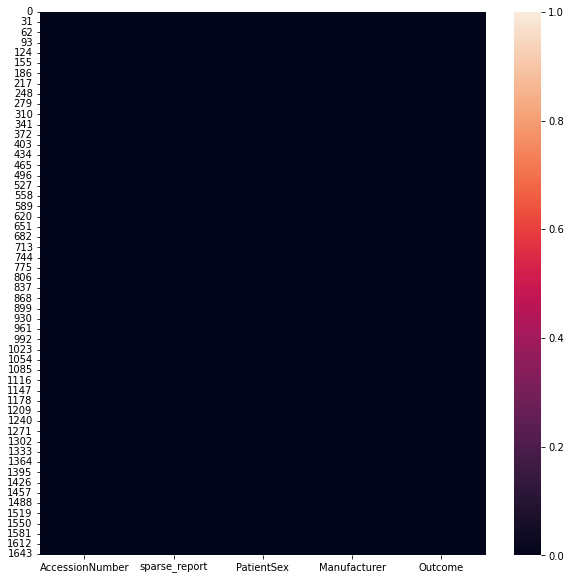

In [176]:
sns.heatmap(out_df.isnull())
#no null value

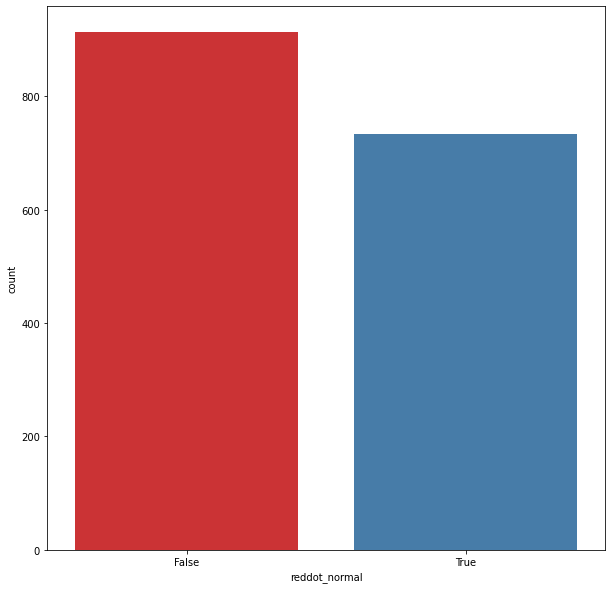

In [177]:
sns.countplot(x='reddot_normal', data=df3_ff, palette='Set1')

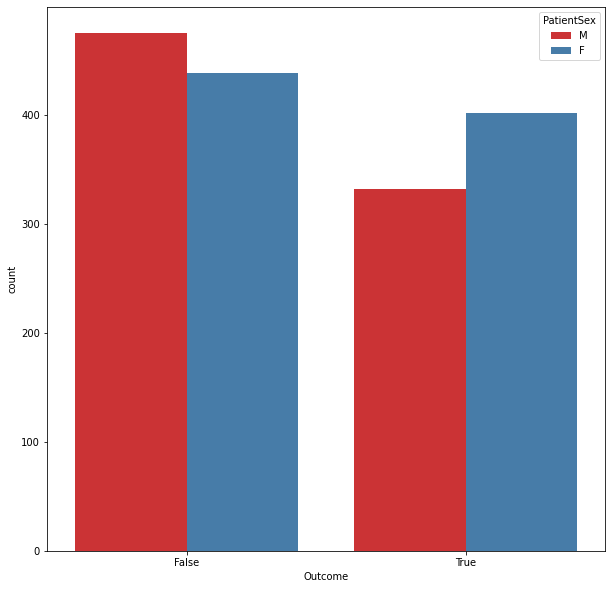

In [178]:
sns.countplot(x='Outcome', hue='PatientSex',data=out_df, palette='Set1')

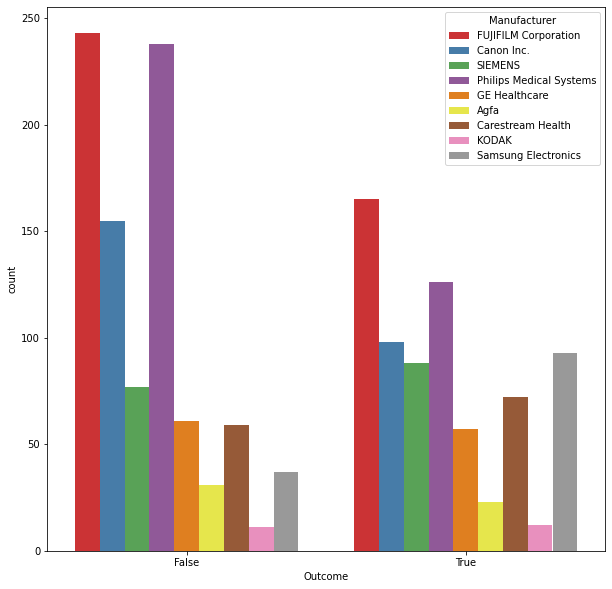

In [179]:
sns.countplot(x='Outcome', hue='Manufacturer',data=out_df, palette='Set1')


In [180]:
out_df.sparse_report = out_df.sparse_report.replace({'Abnormal': 0, 'Normal': 1})

In [181]:
gen_var = pd.get_dummies(out_df['PatientSex'])
manu_var = pd.get_dummies(out_df['Manufacturer'])

In [182]:
out_df.drop(['AccessionNumber','PatientSex','Manufacturer'],axis=1,inplace=True)

In [183]:
out_df = pd.concat([out_df,gen_var,manu_var],axis=1)

In [184]:
out_df

,sparse_report,Outcome,F,M,Agfa,Canon Inc.,Carestream Health,FUJIFILM Corporation,GE Healthcare,KODAK,Philips Medical Systems,SIEMENS,Samsung Electronics
0,0,False,0,1,0,0,0,1,0,0,0,0,0
1,0,False,0,1,0,1,0,0,0,0,0,0,0
2,0,True,0,1,0,0,0,1,0,0,0,0,0
3,1,True,0,1,0,0,0,0,0,0,0,1,0
4,1,False,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,1,True,0,1,0,0,0,1,0,0,0,0,0
1643,1,False,0,1,0,0,0,0,0,0,1,0,0
1644,1,True,0,1,0,0,0,0,0,0,0,1,0
1645,1,True,0,1,0,0,0,0,0,0,1,0,0


In [185]:
out_df.Outcome = out_df.Outcome.replace({True: 1, False: 0}) 

In [186]:
out_df

,sparse_report,Outcome,F,M,Agfa,Canon Inc.,Carestream Health,FUJIFILM Corporation,GE Healthcare,KODAK,Philips Medical Systems,SIEMENS,Samsung Electronics
0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,1,1,0,1,0,0,0,1,0,0,0,0,0
1643,1,0,0,1,0,0,0,0,0,0,1,0,0
1644,1,1,0,1,0,0,0,0,0,0,0,1,0
1645,1,1,0,1,0,0,0,0,0,0,1,0,0


In [187]:
out_df['model_perf'] = out_df['Outcome']+out_df['sparse_report']
out_df['model_perf'] = out_df['model_perf'].replace({1: 0, 2: 1})
#put model_perf first column

In [188]:
out_df

,sparse_report,Outcome,F,M,Agfa,Canon Inc.,Carestream Health,FUJIFILM Corporation,GE Healthcare,KODAK,Philips Medical Systems,SIEMENS,Samsung Electronics,model_perf
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,0,1,0,1
4,1,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,1,1,0,1,0,0,0,1,0,0,0,0,0,1
1643,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1644,1,1,0,1,0,0,0,0,0,0,0,1,0,1
1645,1,1,0,1,0,0,0,0,0,0,1,0,0,1


In [189]:
model_performance = out_df['model_perf']
print(model_performance)

0       0
1       0
2       0
3       1
4       0
       ..
1642    1
1643    0
1644    1
1645    1
1646    0
Name: model_perf, Length: 1647, dtype: int64


In [190]:
print(sum(model_performance))
#try for true == 0 and false ==1 - if sum(model_performance) higher, then change == 229
#try for true == 1 and false ==0 - if sum(model_performance) == 532 SO assumed this was the correct assumption 

531


In [191]:
#true: good performance 
#false: bad performance 

In [192]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   sparse_report            1647 non-null   int64
 1   Outcome                  1647 non-null   int64
 2   F                        1647 non-null   uint8
 3   M                        1647 non-null   uint8
 4   Agfa                     1647 non-null   uint8
 5   Canon Inc.               1647 non-null   uint8
 6   Carestream Health        1647 non-null   uint8
 7   FUJIFILM Corporation     1647 non-null   uint8
 8   GE Healthcare            1647 non-null   uint8
 9   KODAK                    1647 non-null   uint8
 10  Philips Medical Systems  1647 non-null   uint8
 11  SIEMENS                  1647 non-null   uint8
 12  Samsung Electronics      1647 non-null   uint8
 13  model_perf               1647 non-null   int64
dtypes: int64(3), uint8(11)
memory usage: 56.4 KB


In [193]:
out_df.drop(['sparse_report','Outcome'], axis=1, inplace=True)

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(out_df.drop('model_perf', axis=1), 
                                                    out_df['model_perf'], test_size=0.20, 
                                                    random_state=101)

In [195]:
print(X_train)

      F  M  Agfa  Canon Inc.  Carestream Health  FUJIFILM Corporation  \
1136  1  0     0           0                  0                     0   
768   1  0     0           0                  0                     1   
664   0  1     0           0                  0                     0   
510   1  0     0           0                  0                     0   
552   1  0     0           0                  0                     1   
...  .. ..   ...         ...                ...                   ...   
599   0  1     0           0                  0                     0   
1599  1  0     0           1                  0                     0   
1361  0  1     0           0                  0                     0   
1547  1  0     0           0                  0                     0   
863   0  1     0           1                  0                     0   

      GE Healthcare  KODAK  Philips Medical Systems  SIEMENS  \
1136              0      0                        0        

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot 

In [197]:
logitmod = LogisticRegression(class_weight='balanced', max_iter=200)
logitmod.fit(X_train, y_train)
pred_log = logitmod.predict(X_test)

In [198]:
w_feature = logitmod.coef_.flatten()
print(w_feature)
print(len(w_feature))

[ 0.15931965 -0.16267897  0.1995267  -0.62144537  0.56677564 -0.00964338
 -0.03378689 -0.04411425 -0.46685775 -0.00977414  0.81770012]
11


In [199]:
print(len(out_df.columns))
print(out_df.columns)
print(out_df.columns[0:19])

12
Index(['F', 'M', 'Agfa', 'Canon Inc.', 'Carestream Health',
       'FUJIFILM Corporation', 'GE Healthcare', 'KODAK',
       'Philips Medical Systems', 'SIEMENS', 'Samsung Electronics',
       'model_perf'],
      dtype='object')
Index(['F', 'M', 'Agfa', 'Canon Inc.', 'Carestream Health',
       'FUJIFILM Corporation', 'GE Healthcare', 'KODAK',
       'Philips Medical Systems', 'SIEMENS', 'Samsung Electronics',
       'model_perf'],
      dtype='object')


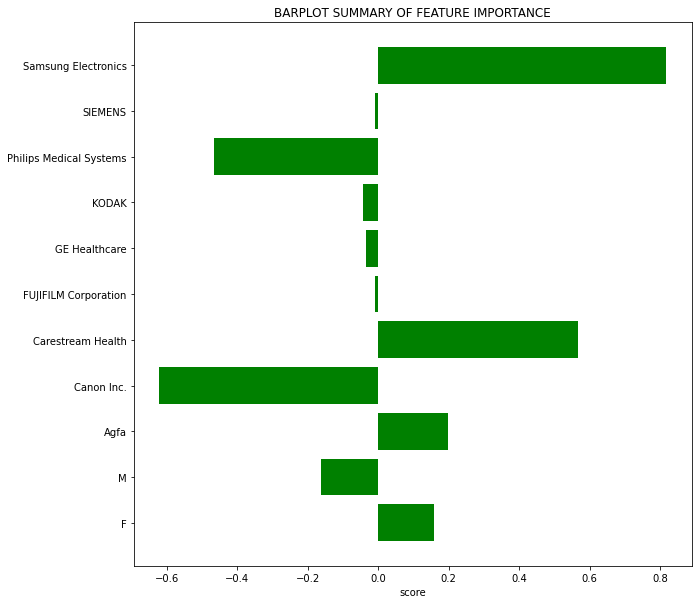

In [200]:
pyplot.rcParams["figure.figsize"] = (10,10)
pyplot.barh(out_df.columns[0:11],w_feature,color='g')
pyplot.title("BARPLOT SUMMARY OF FEATURE IMPORTANCE")
pyplot.xlabel('score')
pyplot.show()
#Positive scores indicate a feature that predicts class 1 (True)
#Negative scores indicate a feature that predicts class 2 (False)

In [201]:
logitmod.intercept_

array([0.05136061])

In [202]:
logitmod.score(X_test, y_test)

0.5787878787878787

In [203]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       210
           1       0.43      0.47      0.45       120

    accuracy                           0.58       330
   macro avg       0.55      0.55      0.55       330
weighted avg       0.59      0.58      0.58       330



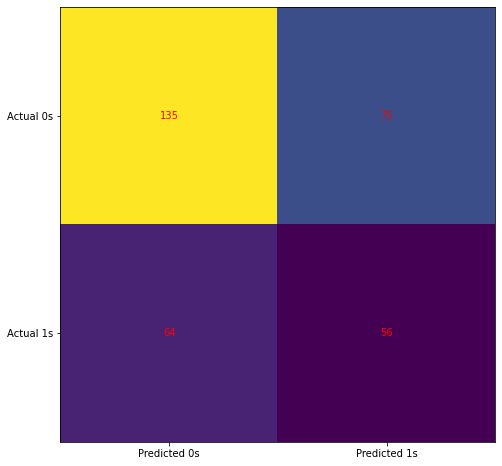

In [204]:
cm = confusion_matrix(y_test, logitmod.predict(X_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [205]:
#high diag = accurate  
tot_len = len(y_test)
n = (121+74)/tot_len
print(n)

0.5909090909090909
